## Лаб 3
### Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
### Кабанец РТ5-61Б

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
# Загрузка набора данных
data = load_breast_cancer()
X = data.data # Признаки
y = data.target # целевая переменная 

In [3]:
# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Обучение модели ближайших соседей
k = 5  # Произвольно заданный гиперпараметр k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
# Предсказание на тестовой выборке
y_pred = knn.predict(X_test)

In [6]:
# Оценка качества модели на тестовой выборке
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Метрики на тестовой выборке:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Метрики на тестовой выборке:
Accuracy: 0.956140350877193
Precision: 0.9342105263157895
Recall: 1.0


In [7]:
# Кросс-валидация
cv_scores = cross_val_score(knn, X, y, cv=5)
print("Средняя точность на кросс-валидации:", np.mean(cv_scores))

Средняя точность на кросс-валидации: 0.9279459711224964


In [8]:
# Подбор гиперпараметра k с использованием GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

print("Наилучшее значение гиперпараметра k:", grid_search.best_params_)
print("Наилучшая точность:", grid_search.best_score_)

Наилучшее значение гиперпараметра k: {'n_neighbors': 13}
Наилучшая точность: 0.9332401800962584


In [9]:
# Повторное обучение модели с оптимальным значением k
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [10]:
# Оценка качества модели с оптимальным значением k
y_pred_best = knn_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)

print("\nМетрики на тестовой выборке с оптимальным значением k:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)


Метрики на тестовой выборке с оптимальным значением k:
Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0


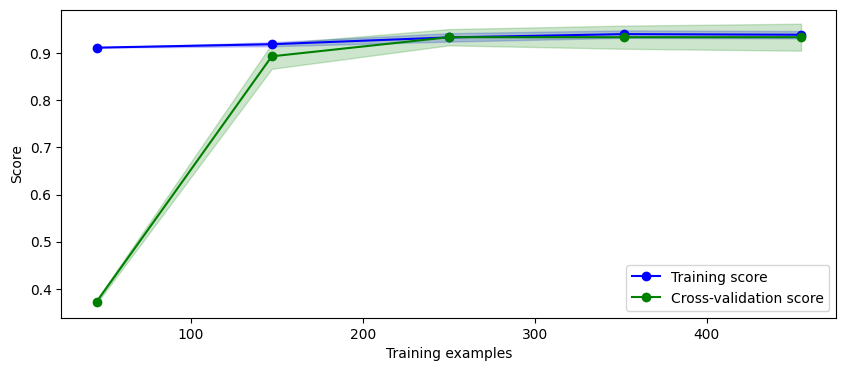

In [13]:
# Кривые обучения и валидации
train_sizes, train_scores, test_scores = learning_curve(
    knn_best, X, y, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 4))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()
